In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [4]:
df = pd.read_csv('stud.csv')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
X = df.drop(columns = ['math_score'], axis = 1)

In [7]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [10]:
print('Categories in Gender Values', end="")
print(df['gender'].unique())
print('Categories in Race Ethnicity Values', end="")
print(df['race_ethnicity'].unique())
print('Categories in parental_level_of_education', end="")
print(df['parental_level_of_education'].unique())
print('Categories in lunch', end="")
print(df['lunch'].unique())
print('Categories in test_preparation_course', end="")
print(df['test_preparation_course'].unique())

Categories in Gender Values['female' 'male']
Categories in Race Ethnicity Values['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch['standard' 'free/reduced']
Categories in test_preparation_course['none' 'completed']


In [11]:
y = df['math_score']

In [17]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer, cat_features ),
        ('StandardScaler',num_transformer, num_features)
    ]
)


In [18]:
X = preprocessor.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.25, random_state=42)


In [25]:
def evaluvate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, r2_square, rmse


In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluvate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluvate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.8918
- Mean Absolute Error: 4.0060
- R2 Score: 4.9894
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8649
- Mean Absolute Error: 4.4403
- R2 Score: 5.5686


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.8140
- Mean Absolute Error: 5.1872
- R2 Score: 6.5417
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8048
- Mean Absolute Error: 5.2682
- R2 Score: 6.6933


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.8916
- Mean Absolute Error: 4.0127
- R2 Score: 4.9924
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8655
- Mean Absolute Error: 4.4225
- R2 Score: 5.5554


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.8526
- Mean Absolute Error: 4.6424
- R2 Score: 5.8227
-----------------------

In [29]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
4,Decision Tree,8.735178
3,K-Neighbors Regressor,7.476145
6,XGBRegressor,7.238905
8,AdaBoost Regressor,6.778709
1,Lasso,6.693295
7,CatBoosting Regressor,6.437851
5,Random Forest Regressor,6.279368
0,Linear Regression,5.568643
2,Ridge,5.555377


In [30]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 86.49


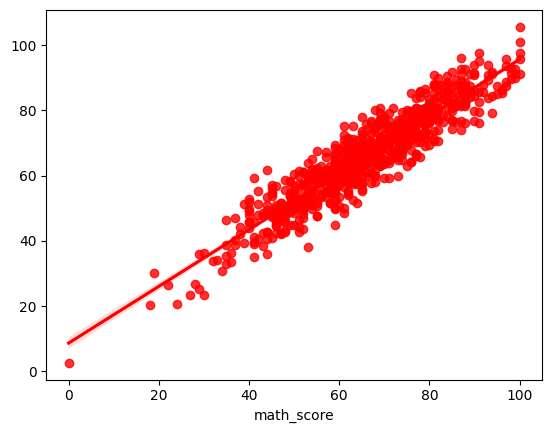

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');